# Visualization
This notebook is used for the visualization and summarization of the data.

In [1]:
import sys
sys.path.append('../utils/')
from visualization import *


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")


In [2]:
DATA_PATH = '../../data/intermediate/'
IMAGE_PATH = '../../images/visualization/'

## 1. Students

In [3]:
students = pd.read_csv(DATA_PATH+'students.csv', index_col=0)
students.head(3)

,age_end,age_now,age_start,birth_date,citizenship,date_end,date_start,degree,gender,graduated,...,major,major_number,permanent_address,relevance_date,study_length,university,year_of_study,years_for_degree,years_extra,dropout
0,29.0,40.0,23.0,1982.0,NaN,2011.0,2005,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,NaN,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False
1,25.0,32.0,19.0,1990.0,NaN,2015.0,2009,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,NaN,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False
2,25.0,35.0,19.0,1987.0,NaN,2012.0,2006,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,NaN,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False


### 1.1 Graduated majors

Všeobecné lékařství             10479
Zubní lékařství                  1912
Vojenské všeobecné lékařství       96
Vojenské zubní lékařství            3
Name: major, dtype: int64

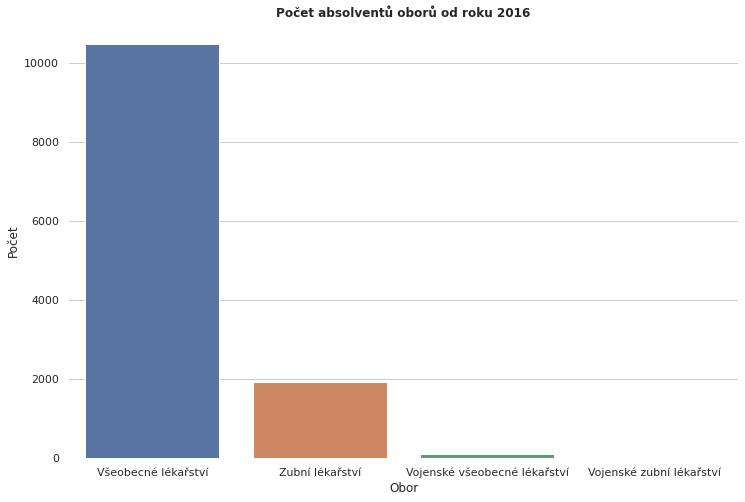

In [4]:
title = 'Počet absolventů oborů od roku 2016'

student_majors = students[(students.graduated == True) & (students.date_end >= 2016)]['major'].value_counts()

display(student_majors)
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")

plt.title(title, fontweight="bold")
plt.ylabel('Počet')
plt.xlabel('Obor')

sns.despine(bottom = True, left = True)
sns.barplot(student_majors.index, student_majors.values);

save_plot(title)

### 1.2 Graduates

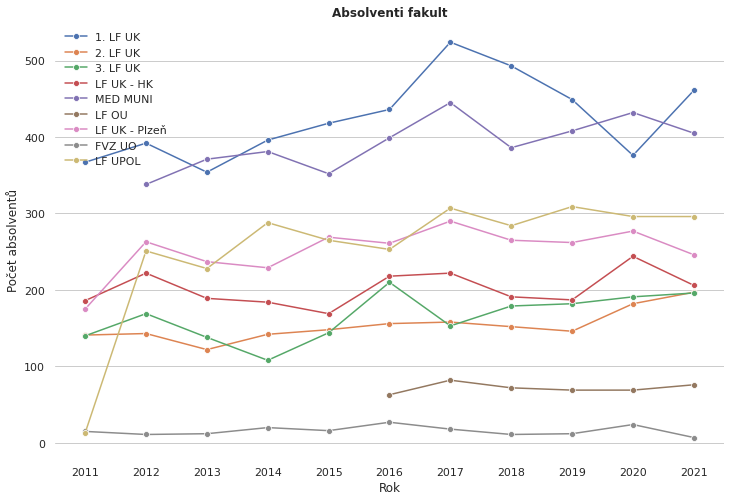

In [5]:
title = 'Absolventi fakult'

graduates = (students[(students.graduated == True) & (students.date_end < 2022)].groupby(['date_end', 'university'])[['degree']]
                                                                                .count()
                                                                                .reset_index())

graduates = graduates.pivot(index=graduates['date_end'], columns='university')['degree']

graduates.columns = ['1. LF UK', '2. LF UK', '3. LF UK', 'LF UK - HK', 'MED MUNI', 'LF OU', 'LF UK - Plzeň', 'FVZ UO', 'LF UPOL']

plt.grid(True, axis='y')
sns.set(rc={'figure.figsize':(16,10)})

for faculty in graduates.columns:
    ax = sns.lineplot(graduates.index, graduates[faculty], label=faculty, marker="o", linewidth = 1.5)
sns.despine(bottom = True, left = True)

plt.xticks(graduates.index)
plt.title(title, fontweight="bold")


ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines

plt.legend(frameon=False)
plt.xlabel('Rok')
plt.ylabel('Počet absolventů');

save_plot(title)
plt.show();

### 1.3 Applicants

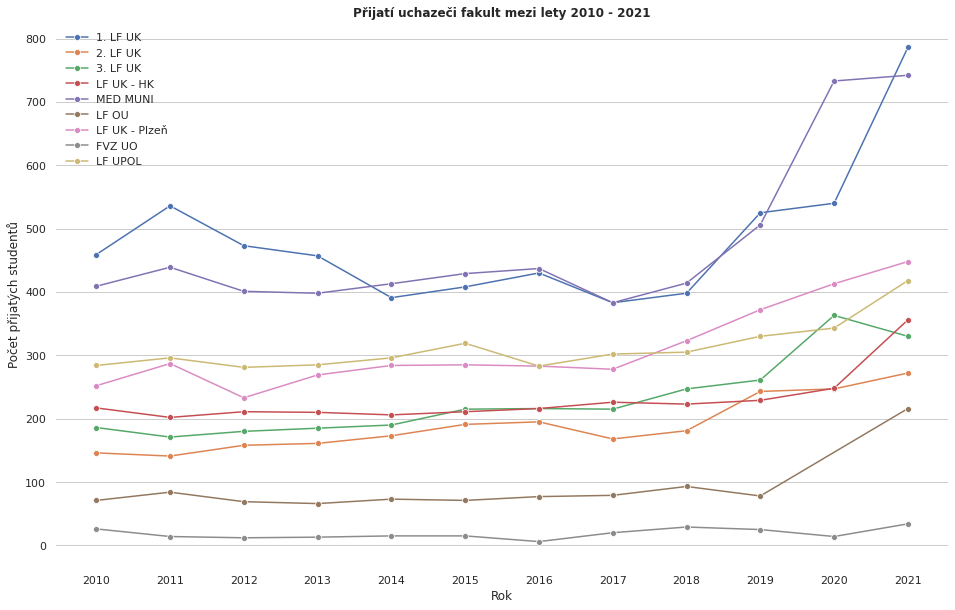

In [6]:

year_last = 2021
year_first = 2010
year_filter = ( year_first<= students.date_start)&(students.date_start <= year_last)
applicants = (students[year_filter].groupby(['date_start', 'university'])[['degree']]
                                                                                .count()
                                                                                .reset_index())

title = f'Přijatí uchazeči fakult mezi lety {year_first} - {year_last}'


sns.set_style("whitegrid")

applicants = applicants.pivot(index=applicants['date_start'], columns='university')['degree']

applicants.columns = ['1. LF UK', '2. LF UK', '3. LF UK', 'LF UK - HK', 'MED MUNI', 'LF OU', 'LF UK - Plzeň', 'FVZ UO', 'LF UPOL']


for faculty in applicants.columns:
    ax = sns.lineplot(applicants.index, applicants[faculty], label=faculty, marker="o")
    
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines
sns.despine(bottom = True, left = True)



plt.xticks(applicants.index)
plt.title(title, fontweight="bold")
plt.xlabel('Rok')
plt.ylabel('Počet přijatých studentů')
plt.legend(frameon=False)


save_plot(title)
plt.show();

### 1.4 Citizenship

citizenship
CZE        57.198325
SVK        26.821469
GBR         2.801675
PRT         1.218120
GER         1.081081
Ostatní    10.879330
Name: degree, dtype: float64


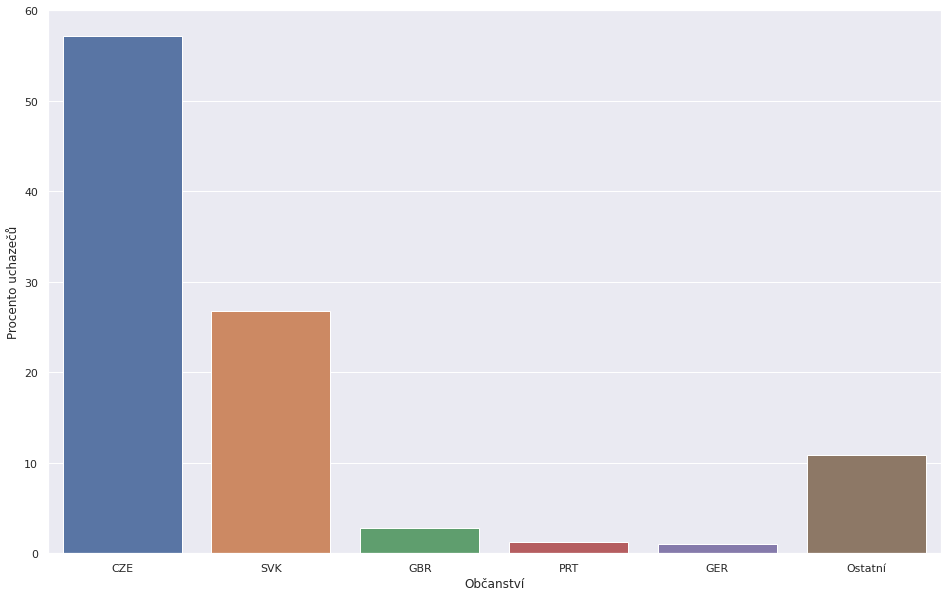

In [7]:
N = 5

title = f'Občanství přijatých uchazečů'
sns.set(rc={'figure.figsize':(16,10)})

citizenship = students.groupby(['citizenship'])['degree'].count()
citizenship = citizenship.sort_values(ascending=False)
citizenship['Ostatní'] = citizenship[N:].sum()
citizenship = citizenship.iloc[[*range(N),-1]]


citizenship = 100*citizenship/sum(citizenship)
print(citizenship)

# def fmt(x):
#     return '{:.1f}%\n({:.0f})'.format(x, citizenship.sum()*x/100)

# plt.pie(citizenship.values,
#         labels=citizenship.index,
#         startangle=90,
#         autopct=fmt,
#         pctdistance=0.8,
#         counterclock=False)
# plt.legend()
# plt.axis('equal')

sns.despine(bottom = True, left = True)
sns.barplot(citizenship.index, citizenship.values);

# plt.title(title, fontweight="bold")
plt.ylabel('Procento uchazečů')
plt.xlabel('Občanství')


save_plot(title)

plt.show()

citizenship
CZE        60.019097
SVK        26.885827
GBR         3.205565
MYS         1.909699
PRT         1.759651
Ostatní     6.220161
Name: graduated, dtype: float64


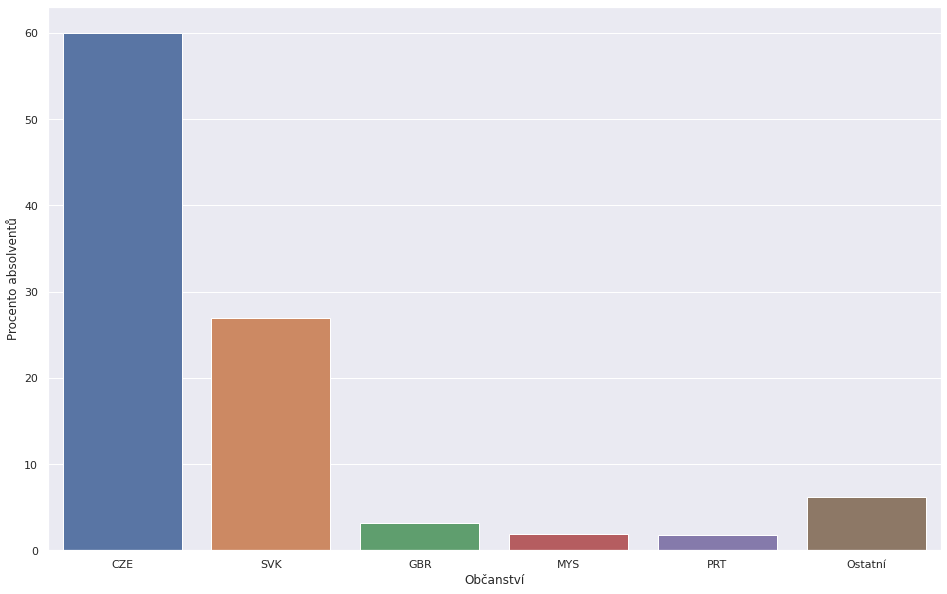

In [8]:
N = 5

title = f'Občanství absolventů'
sns.set(rc={'figure.figsize':(16,10)})

citizenship = students[students.graduated == True].groupby(['citizenship'])['graduated'].count()
citizenship = citizenship.sort_values(ascending=False)
citizenship['Ostatní'] = citizenship[N:].sum()
citizenship = citizenship.iloc[[*range(N),-1]]


citizenship = 100*citizenship/sum(citizenship)
print(citizenship)



sns.despine(bottom = True, left = True)
sns.barplot(citizenship.index, citizenship.values);


# plt.title(title, fontweight="bold")
plt.ylabel('Procento absolventů')
plt.xlabel('Občanství')


save_plot(title)

plt.show()

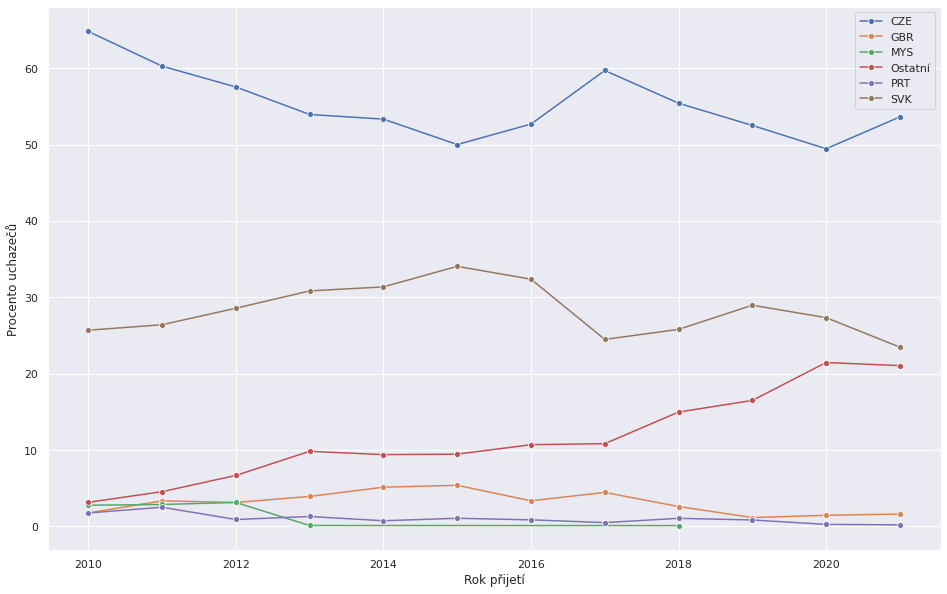

In [9]:
title = f'Vývoj počtu uchazečů'

tmp = students.copy(deep=True)
tmp.loc[(~tmp.citizenship.isin(citizenship.index)) & (~tmp.citizenship.isna()),'citizenship'] = 'Ostatní'
tmp = tmp[(tmp.date_start >= 2010)&(tmp.date_start <= 2021)]
tmp = tmp.groupby(['citizenship','date_start'])['graduated'].count().reset_index()


# students
n_students = tmp.groupby(by='date_start').sum().reset_index()
n_students.columns = ['date_start', 'total']
perc_students = pd.merge(tmp, n_students)
perc_students['perc'] = 100 * perc_students['graduated'] / perc_students['total'] 


for i in tmp.citizenship.unique():
    sns.lineplot(perc_students.date_start, perc_students[perc_students.citizenship == i].perc, label=i, marker="o")
    
    
plt.ylabel('Procento uchazečů')
plt.xlabel('Rok přijetí')
save_plot(title)

plt.show()

### 1.5 Language

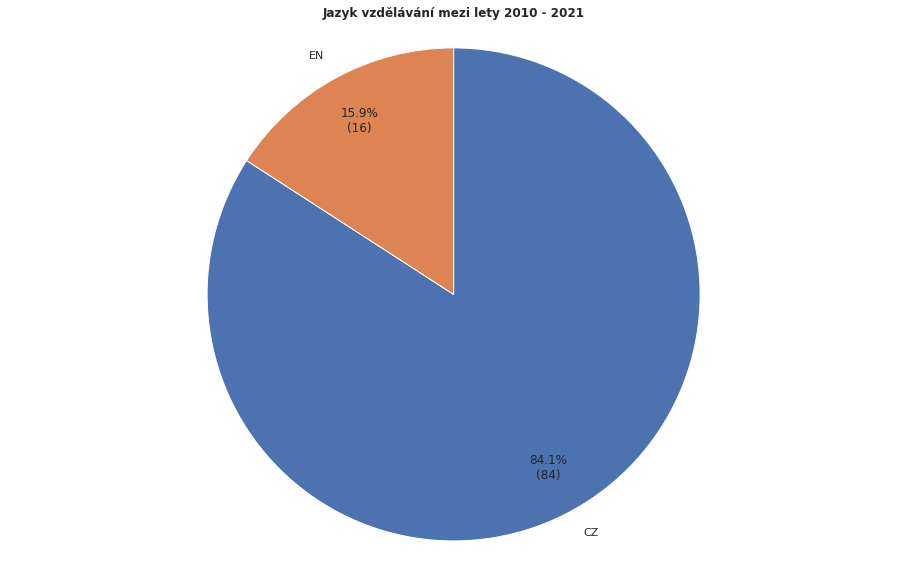

In [10]:
language = students[year_filter].groupby('language')['graduated'].count()

def fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, citizenship.sum()*x/100)

plt.pie(language.values,
        labels=language.index,
        startangle=90,
        autopct=fmt,
        pctdistance=0.8,
        counterclock=False)

# plt.legend()
plt.axis('equal')
plt.title(f'Jazyk vzdělávání mezi lety {year_first} - {year_last}', fontweight="bold")
plt.show()

### 1.6 Age

In [4]:
print(f'Avg age end: {np.nanmean(students[students.graduated == True].age_end)}')
print(f'Avg age end: {np.nanmean(students.age_start)}')

Avg age end: 26.856416645900822
Avg age end: 20.796480855855854


Všeobecné lékařství


,age_end
count,16586.000000
mean,27.040516
std,2.763459
min,18.000000
25%,25.000000
50%,26.000000
75%,29.000000
max,67.000000


Zubní lékařství


,age_end
count,3306.000000
mean,25.955233
std,2.940837
min,19.000000
25%,24.000000
50%,25.000000
75%,27.000000
max,55.000000


Vojenské všeobecné lékařství


,age_end
count,168.000000
mean,26.452381
std,1.451035
min,25.000000
25%,26.000000
50%,26.000000
75%,27.000000
max,33.000000


Vojenské zubní lékařství


,age_end
count,5.000000
mean,25.600000
std,1.140175
min,24.000000
25%,25.000000
50%,26.000000
75%,26.000000
max,27.000000


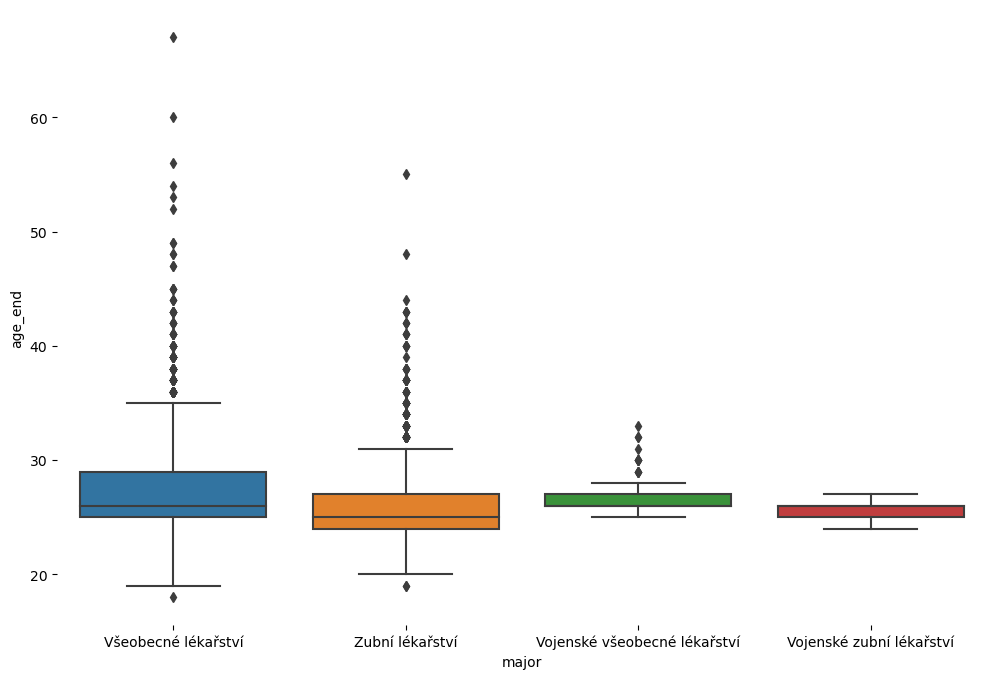

In [4]:
dr = students[students['graduated'] == True][['graduated', 'major', 'age_end']]

for major in dr.major.unique():
    print(major)
    display(dr[dr.major == major].describe())
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="major", y="age_end", data=dr)
sns.despine(bottom = True, left = True)
plt.show()


Všeobecné lékařství


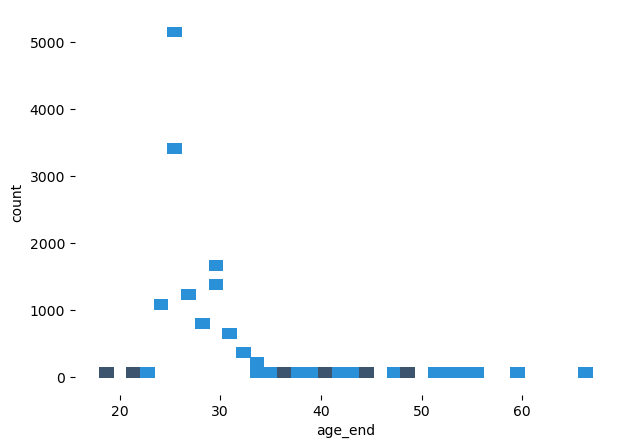

Zubní lékařství


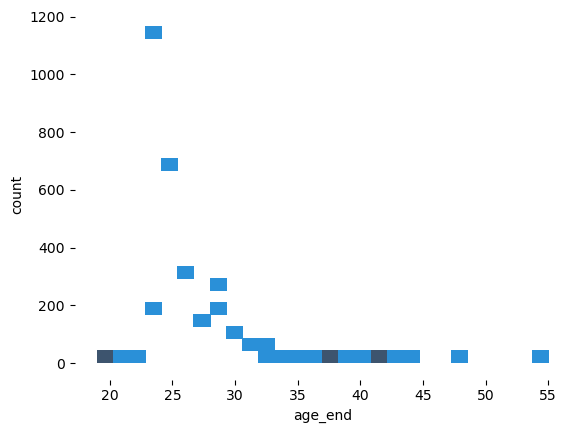

Vojenské všeobecné lékařství


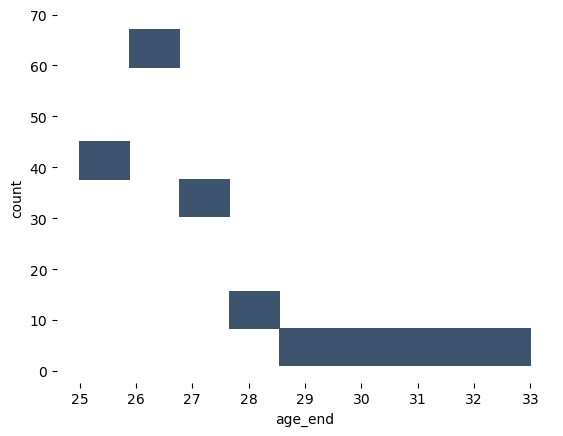

Vojenské zubní lékařství


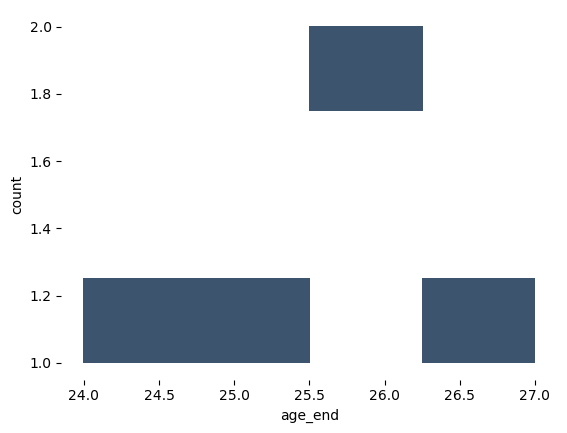

In [33]:
dr = students[students['graduated'] == True][['major', 'age_end']]

plt.figure(figsize=(7,5))

for major in dr.major.unique():
    print(major)
    dr_cnt = dr[dr.major == major].groupby('age_end').count().reset_index()
    # display(dr_cnt)
    sns.histplot(x=dr_cnt.age_end, y=dr_cnt.major, bins=dr_cnt.shape[0])
    plt.ylabel('count')
    plt.xlabel('age_end')
    sns.despine(bottom = True, left = True)
    plt.show()


### 1.7 Study length

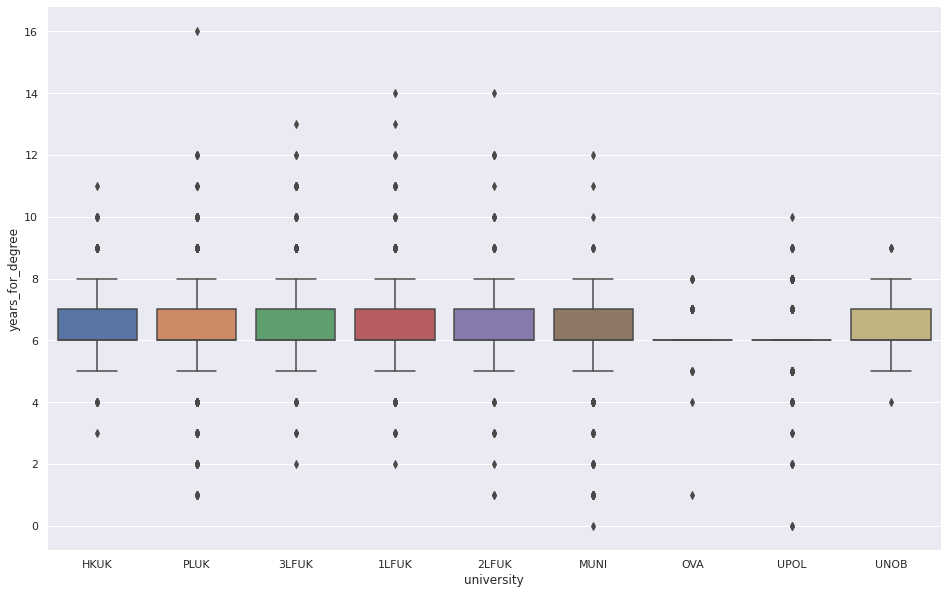

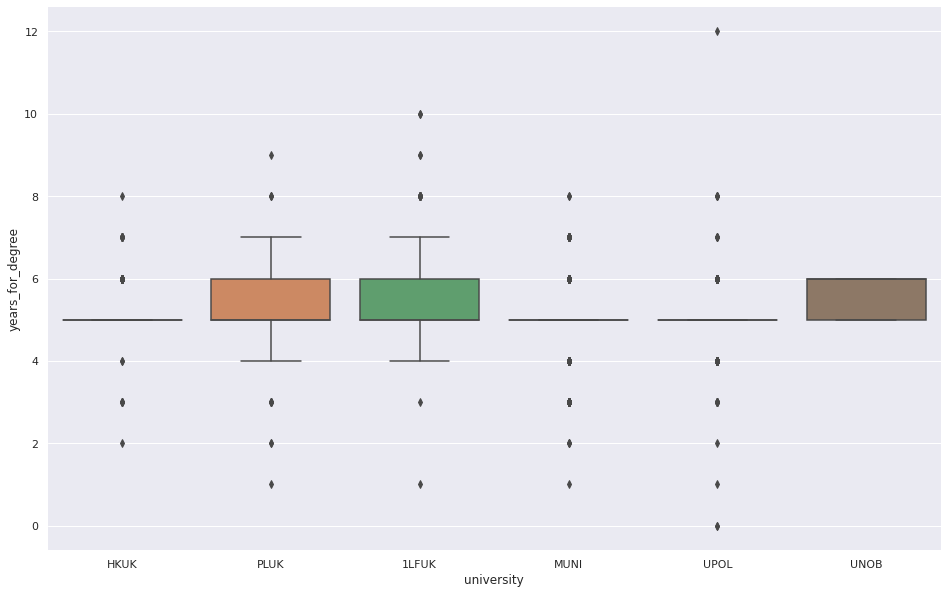

In [12]:
for degree in students['degree'].unique():
    dr = students[students['degree'] == degree]

    ax = sns.boxplot(x="university", y="years_for_degree", data=dr)
    sns.despine(bottom = True, left = True)
    plt.show()

In [5]:
study_length_info(students)

Průměrná délka studia k získání titulu MUDR.: 6.33 let (počet ročníků studia: 6.0)
Podle fakult:
   - HKUK: 6.36 let (prodlužovalo: 27.86 %)
   - PLUK: 6.4 let (prodlužovalo: 33.8 %)
   - 3LFUK: 6.41 let (prodlužovalo: 29.45 %)
   - 1LFUK: 6.45 let (prodlužovalo: 37.3 %)
   - 2LFUK: 6.4 let (prodlužovalo: 34.91 %)
   - MUNI: 6.17 let (prodlužovalo: 25.6 %)
   - OVA: 6.06 let (prodlužovalo: 6.96 %)
   - UPOL: 6.14 let (prodlužovalo: 16.09 %)
   - UNOB: 6.39 let (prodlužovalo: 34.52 %)
--------------------------------------------------------------------------------
Průměrná délka studia k získání titulu MUDR.: 5.12 let (počet ročníků studia: 5.0)
Podle fakult:
   - HKUK: 5.16 let (prodlužovalo: 16.55 %)
   - PLUK: 5.25 let (prodlužovalo: 27.85 %)
   - 1LFUK: 5.3 let (prodlužovalo: 25.87 %)
   - MUNI: 4.97 let (prodlužovalo: 16.3 %)
   - UPOL: 4.99 let (prodlužovalo: 5.25 %)
   - UNOB: 5.6 let (prodlužovalo: 60.0 %)
-------------------------------------------------------------------------

,Fakulta,Průměrná délka studia,Prodloužení studia (%)
0,HKUK,6.36,27.86
1,PLUK,6.40,33.80
2,3LFUK,6.41,29.45
3,1LFUK,6.45,37.30
4,2LFUK,6.40,34.91
5,MUNI,6.17,25.60
6,OVA,6.06,6.96
7,UPOL,6.14,16.09
8,UNOB,6.39,34.52
9,HKUK,5.16,16.55


# IC

In [9]:
ic = pd.read_feather(DATA_PATH+'insurance_companies.ftr').drop(columns=['index'])

In [10]:
ic[['expertise', 'year', 'count']].groupby(by=['expertise', 'year']).sum().sort_values('count').tail(20)

count
expertise year           
XNA       2015   37689761
          2016   37896299
          2017   38136081
          2018   38407574
913       2019   41030378
XNA       2021   42876613
913       2021   46502403
XNA       2020   50786298
          2019   52228009
913       2020   53283336
801       2021  106315362
          2012  117026949
          2013  118035334
          2014  120886025
          2015  123050844
          2020  125187118
          2016  127140610
          2017  128529698
          2018  131344908
          2019  135765030

In [18]:
pharmacy = ic[(ic.insurance_company == 'VZP') & (ic.procedure_code == 9552)].groupby(by='year').sum()[['count']].reset_index()
pharmacy.columns = ['Rok', 'Počet']
pharmacy

,count,facilities_id,procedure_code
year,,,
2015,37693090,0.0,38208.0
2016,37896299,0.0,28656.0
2017,38136081,0.0,28656.0
2018,38407574,0.0,28656.0
2019,52228009,0.0,28656.0
2020,50786298,0.0,28656.0
2021,42876613,0.0,28656.0
